
## Project: Creating Customer Segments

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
# Pretty display for notebooks
%matplotlib inline


# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9658,2182,1909,5639,215,323
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

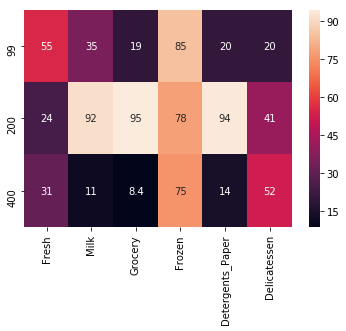

In [4]:
indices = [99,200,400
          ]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

data.median()

In [5]:
from sklearn.model_selection import train_test_split
target= data['Grocery']
data.drop(['Grocery'], axis = 1,inplace=True)

# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)


from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)


score = regressor.score(X_test,y_test)
print(score)

0.681884008544



   

    Grocery -->Score:0.681884008544
    So the feature is not neccesary for identifying customers' spending habbits as it could be predicted using other features.
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fb68978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110715a90>]], dtype=object)

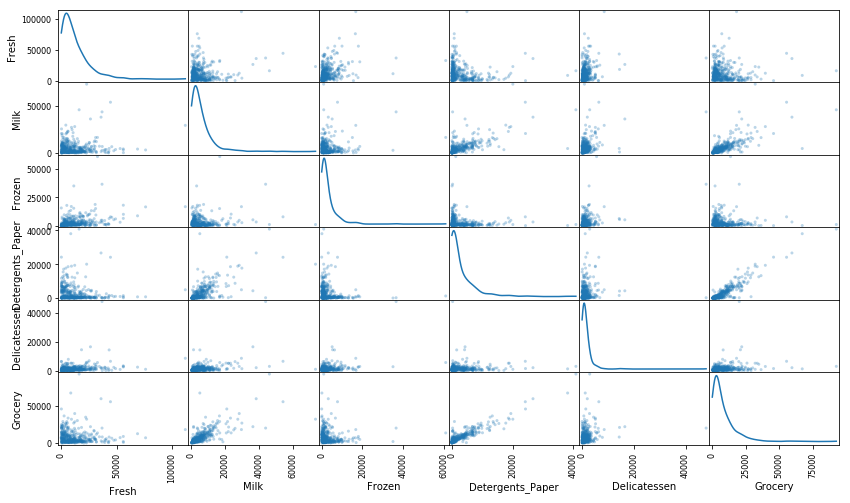

In [6]:
data['Grocery']=target
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b06128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111454b38>]], dtype=object)

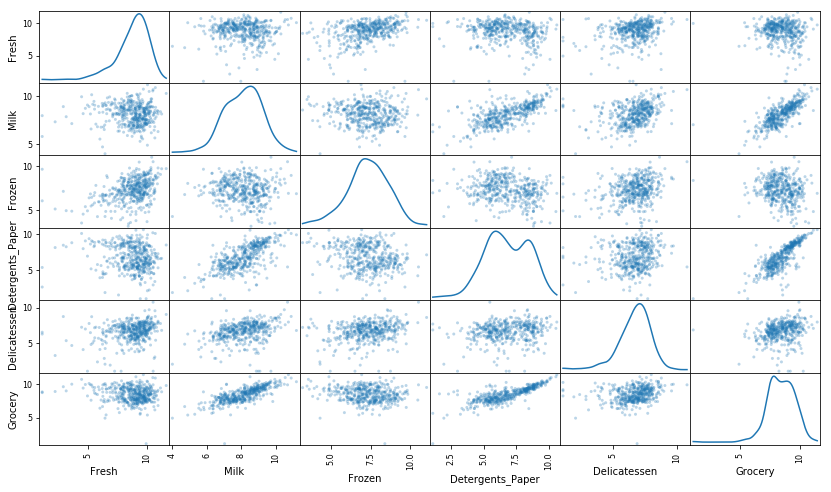

In [7]:

log_data = np.log(data)


log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.175542,7.687997,7.554335,8.637462,5.370638,5.777652
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


In [9]:
# For each feature find the data points with extreme high or low values
list_a=[]
for feature in log_data.keys():
   
    Q1 = np.percentile(log_data[feature],25)
   
   
    Q3 = np.percentile(log_data[feature],75)
    
    
    step = 1.5*(Q3-Q1)
    #Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    list_a.append(list(log_data.index[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]))
outliers  = []
for i in range(len(list_a)):
    for value in list_a[i]:
        if any(value in val for val in list_a[i+1:]):
            outliers.append(value)
# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
65,4.442651,9.950323,3.583519,10.095388,7.260523,10.732651
66,2.197225,7.335634,5.164786,8.151333,3.295837,8.911530
81,5.389072,9.163249,5.645447,8.964184,5.049856,9.575192
95,1.098612,7.979339,6.086775,5.407172,6.563856,8.740657
96,3.135494,7.869402,4.976734,8.262043,5.379897,9.001839
128,4.941642,9.087834,4.955827,6.967909,1.098612,8.248791
171,5.298317,10.160530,6.478510,9.079434,8.740337,9.894245
193,5.192957,8.156223,6.865891,8.633731,6.501290,9.917982
218,2.890372,8.923191,7.158514,8.475746,8.759669,9.629380
304,5.081404,8.917311,6.424869,9.374413,7.787382,10.117510


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
86,10.039983,11.205013,6.894670,9.906981,6.805723,10.377047
98,6.220590,4.718499,6.796824,4.025352,4.882802,6.656727
154,6.432940,4.007333,4.317488,1.945910,2.079442,4.919981
356,10.029503,4.897840,8.057377,2.197225,6.306275,5.384495


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
38,8.431853,9.663261,3.496508,8.847360,6.070738,9.723703
57,8.597297,9.203618,3.637586,8.932213,7.156177,9.257892
65,4.442651,9.950323,3.583519,10.095388,7.260523,10.732651
145,10.000569,9.034080,3.737670,9.440738,8.396155,10.457143
175,7.759187,8.967632,3.951244,8.341887,7.436617,9.382106
264,6.978214,9.177714,4.110874,8.696176,7.142827,9.645041
325,10.395650,9.728181,11.016479,7.148346,8.632128,9.519735
420,8.402007,8.569026,3.218876,8.827321,7.239215,9.490015
429,9.060331,7.467371,3.850148,4.430817,7.824446,8.183118
439,7.932721,7.437206,4.174387,6.167516,3.951244,7.828038


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
75,9.923192,7.036148,8.390949,1.098612,6.882437,1.098612
161,9.428190,6.291569,6.995766,1.098612,7.711101,5.645447


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
66,2.197225,7.335634,5.164786,8.151333,3.295837,8.911530
109,7.248504,9.724899,6.511745,6.728629,1.098612,10.274568
128,4.941642,9.087834,4.955827,6.967909,1.098612,8.248791
137,8.034955,8.997147,6.493754,6.580639,3.583519,9.021840
142,10.519646,8.875147,8.004700,2.995732,1.098612,9.018332
154,6.432940,4.007333,4.317488,1.945910,2.079442,4.919981
183,10.514529,10.690808,10.505999,5.476464,10.777768,9.911952
184,5.789960,6.822197,4.304065,5.811141,2.397895,8.457443
187,7.798933,8.987447,8.743372,8.148735,1.098612,9.192075
203,6.368187,6.529419,6.150603,6.860664,2.890372,7.703459


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
75,9.923192,7.036148,8.390949,1.098612,6.882437,1.098612
154,6.432940,4.007333,4.317488,1.945910,2.079442,4.919981


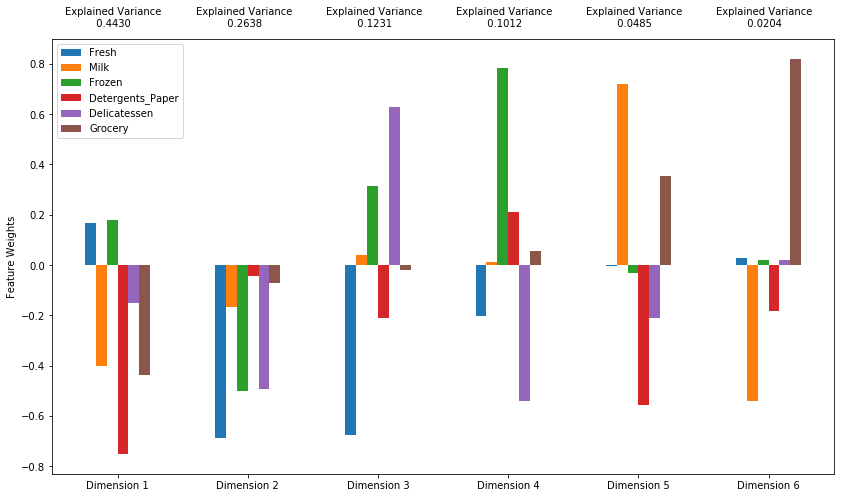

In [10]:
from sklearn.decomposition import PCA


pca = PCA(n_components=6).fit(good_data)


pca_samples = pca.transform(log_samples)


pca_results = vs.pca_results(good_data, pca)

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.2784,0.4440,-1.3911,1.0452,-2.0280,-2.3081
1,-0.8564,-2.2572,2.7150,1.1520,-1.1229,-2.4530
2,0.3162,1.4464,-1.1771,1.0050,-1.9119,-0.8497


In [12]:

pca = PCA(n_components=2).fit(good_data)


reduced_data = PCA(n_components=2).fit_transform(good_data)


pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.2784,0.4440
1,-0.8564,-2.2572
2,0.3162,1.4464


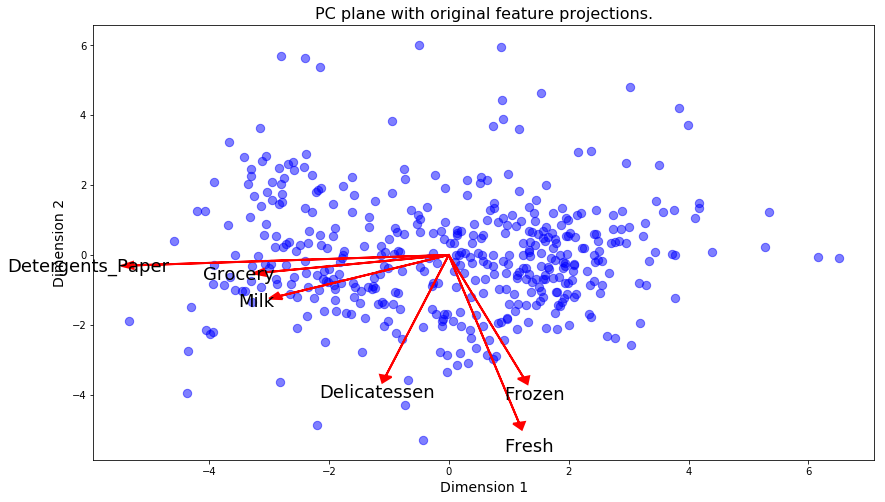

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for cluster_n in range(2,5):
    clusterer = GaussianMixture(n_components=cluster_n).fit(reduced_data)


    preds = clusterer.predict(reduced_data)


    centers = clusterer.means_


    sample_preds = clusterer.predict(pca_samples)


    score = silhouette_score(reduced_data, preds)

    print("Silhouette score for ",cluster_n," is ",score)
cluster_n=2

Silhouette score for  2  is  0.421916846463
Silhouette score for  3  is  0.37420184754
Silhouette score for  4  is  0.294952856964


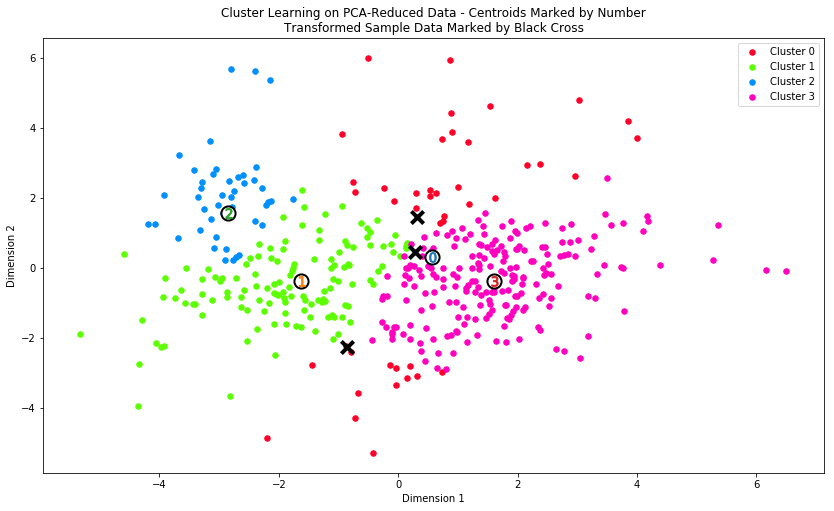

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
data.median()

,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen,Grocery
Segment 0,6883.0,1662.0,1751.0,256.0,544.0,2245.0
Segment 1,6216.0,8148.0,1325.0,4110.0,1357.0,11708.0
Segment 2,1215.0,5635.0,401.0,3907.0,426.0,10197.0
Segment 3,13162.0,2490.0,2725.0,408.0,1008.0,3092.0


Fresh               8504.0
Milk                3627.0
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
Grocery             4755.5
dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Segment 0 represents frozen. This could represent whole sale buyer who would like to use the items for a long time.
Segment 1 represents milk,delicatessen,grocery.This could represent some fast food shop etc.
Segment 2 represents milk,detergents_paper and grocery,it could represent some cafe etc.
Segment 3 represents milk,frozen and delicatessen,it could represent some deli etc.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 3
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
Sample point 0 is best represented by milk,frozen and delicatessen.
Sample point 1 and 2 are best represented by Frozen.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
We can see that since customers in segment 0 buy frozen items more so a change in delivery timings will not effect them so much.
Segments 1,2 and 3 all buy perishable items like milk so a change in ddelivery time will effect them. 
Since items like Milk, Grocery and Detergents_Paper have a high degree of correlation then we can use it to predict that if customer buying Milk gives positive response then so will customers buying detergent_paper and grocery.
We can run an experiment-
Randomly sample 4 groups where we sample 2 groups from each cluster.
Group a1, a2 would be the group experiencing the change and the control group respectively for cluster 0.
Group b1, b2 would be the group experiencing the change and the control group respectively for cluster 1.
We will change the schedules for group a1 and 1b keeping the schedules for a2 and b2 unchanged.
We will conduct surveys.
We can find where customers have a bad experience and where they are not much affected by the change.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
On seeing the data there seem to be two major customer segments- cafe/hotels and retailers/markets.So we could make them as our target variable .So if the customer has a high spending on milk, grocery and detergents_paper then he belongs to the first segment esle to the second segment.
  

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

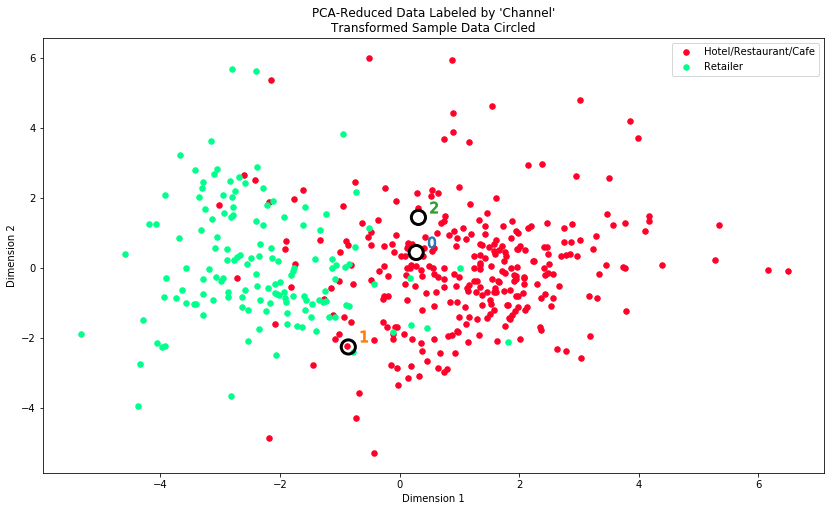

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?


**Answer:**
The number of clusters is consistent with the underlying distribution with 2 major clusters hence the clustering algorithm did well.
Yes the points at extreme ends of the distrbutions would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'.
Yes they are quite much consistent with the previous definition of the customer segments

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.